# Projet - Traitement de donées

### <u>Présentation des donées</u>

Le jeu de données est la liste des objets trouvés dans la gares SNCF, de 2013 à 2019. Il comporte 638338 lignes.

### <u>Définition des fonctions utiles</u>

___Voir la documentation de la fonction___

In [8]:
def csv_vers_liste(adresse, separateur, entetes, encod = "utf-8") :
    """
    Fonction important le fichier csv désigné par son adresse
    Le séparateur est fourni en argument
    Il est aussi possible de préciser l'encodage (utf-8 par défaut)
    et la présence d'entêtes dans la première ligne (celle-ci sera supprimée
    si la valeur passée est True)
    adresse est l'adresse du fichier sur le disque (string)
    separateur est le séparateur utilisé dans le fichier (string)
    entetes est un booléen indiquant si la première ligne du fichier 
    contient les entêtes des colonnes. Cette ligne sera supprimée si la 
    variable vaut True
    encod est l'encodage du fichier (utf-8 par défaut)
    Renvoie la liste de lignes du tableau
    """
    tableau = []

    with open(adresse, "r", encoding = encod) as fichier :
        for ligne in fichier :
            tableau.append(ligne[:-1].split(separateur))

    if entetes :
        tableau.pop(0)
        
    return tableau

In [9]:
def cherche(tableau, condition) :
    """
    Fonction cherchant dans le tableau donné, les lignes vérifiant la condition donnée
    tableau ets un tableau de tableau
    condition est une proposition du type "'man' in ligne[1] and ligne[-3] > 100" pour les héros 
    dont le nom contient 'man' et étant apparus plus de 100 fois
    Renvoie la liste des lignes trouvées ainsi que le nombre de lignes
    """
    
    resultat = [ligne for ligne in tableau if eval(condition)] 
    
    return resultat

In [10]:
def maxi(table, cle) :
    """
    Renvoie la ligne maximale d'une table en étudiant la valeur passée en clé
    table est une liste de liste ou de dictionnaires
    cle est une clé (str) ou un indice (int)
    Renvoie la ligne contenant le maximum et son indice (tuple)
    """
    def renvoie_valeur(l) :
        return l[cle]
    
    maximum = max(table, key = renvoie_valeur)
    indice_max = table.index(maximum)
    
    return maximum, indice_max

In [54]:
def mini(table, cle) :
    """
    Renvoie la ligne minimale d'une table en étudiant la valeur passée en clé
    table est une liste de liste ou de dictionnaires
    cle est une clé (str) ou un indice (int)
    Renvoie la ligne contenant le minimum et son indice (tuple)
    """
    def renvoie_valeur(l) :
        return l[cle]
        
    minimum = min(table, key = renvoie_valeur)
    indice_mini = table.index(minimum)
    
    return minimum, indice_mini


### <u>Importation des donées</u>

A l'aide de la fonction listeObjetsTrouves, nous importons le jeu de donnée, que nous mettons sous la forme d'une liste

In [12]:
listeObjetsTrouves = csv_vers_liste("objets-trouves-restitution.csv", ";", True)
#listeObjetsTrouves[0]

Typage des donées

In [13]:
for ligne in listeObjetsTrouves:
    if ligne[1] == '':
        ligne[1] = False
    if ligne[2] == "":
        ligne[2] = "Non précisé"
    if ligne[3] == "":
        ligne[3] = 0
    ligne[3] = int(ligne[3])

#listeObjetsTrouves[0]

A présent, si la date de restitution indique False, l'objet n'a pas été restitué, et si le numéro UIC indique 0, l'objet n'a pas été retrouvé dans une gare.

On importe également pyplot de matplotlib pour fournir une étude graphique ultérieure

In [38]:
from matplotlib import pyplot as plt

### <u>Etude en France</u>

In [14]:
allLen = []

In [15]:
#on détermine la valeur de base des variables pour optimiser le programme
isDivers = 0
isBagagerie = 0
isLivres = 0
isAppareilsélectroniques = 0
isArticlesdesport = 0
isArticlesmédicaux = 0
isVélos= 0
isArticles = 0
isParapluies = 0
isPorte_monnaie= 0
isOptique = 0
isClés = 0
isInstruments = 0
isBijoux = 0
isPièces = 0
isVêtements = 0

In [60]:
def allCategories(tableau):
    '''
    renvoie la liste de toutes les catégories différentes du tableau
    '''
    categories = [ligne[5] for ligne in tableau] #création d'une liste avec toutes les catégories qui paraissent dans le tableau prinicpal 
    categories = list(set(categories)) #on utilise set() qui jette des éléments afin de n'avoir qu'une seule fois chaque nom de catégories dans la liste
    return categories
#allCategories(listeObjetsTrouves)

In [61]:
#documentation de cette cellule valable pour toutes les fonctions semblables
def tableParapluies(tableau):
    tableParapluies = cherche(tableau, "ligne[5] == 'Parapluies'") #création d'une liste de toutes les lignes avec la condition demandée
    length = len(tableParapluies) #variable pour faciliter la compréhension de l'algorithme
    string = "Parapluies" #variable pour faciliter la compréhension de l'algorithme
    if [string,length] not in allLen : #vérification pour n'avoir qu'une seule fois chaque élements dans la liste
        allLen.append([string,length]) #ajout des éléments dans la liste
    isParapluies = 1 #redéfinition de variable pour optimiser le programme
    return tableParapluies

In [18]:
def tableMoney(tableau):
    tableMoney = cherche(tableau, "ligne[5] == 'Porte-monnaie / portefeuille, argent, titres'")
    length = len(tableMoney)
    string = "Porte-monnaie / portefeuille, argent, titres"
    if [string,length] not in allLen :
        allLen.append([string,length])
    isPorte_monnaie = 1
    return tableMoney

In [19]:
def tableMusique(tableau):
    tableMusique = cherche(tableau, "ligne[5] == 'Instruments de musique'")
    length = len(tableMusique)
    string = "Instruments de musique"
    if [string,length] not in allLen :
        allLen.append([string,length])
    isInstruments = 1
    return tableMusique

In [20]:
def tablePersonnel(tableau):
    tablePersonnel = cherche(tableau, "ligne[5] == 'Pièces d_identités et papiers personnels'")
    length = len(tablePersonnel)
    string = "Pièces d_identités et papiers personnels"
    if [string,length] not in allLen :
        allLen.append([string,length])
    isPièces = 1
    return tablePersonnel

In [21]:
def tableOptique(tableau):
    tableOptique = cherche(tableau, "ligne[5] == 'Optique'")
    length = len(tableOptique)
    string = "Optique"
    if [string,length] not in allLen :
        allLen.append([string,length])
    isOptique = 1
    return tableOptique

In [22]:
def table2Roues(tableau):
    table2Roues = cherche(tableau, "ligne[5] == 'Vélos, trottinettes, accessoires 2 roues'")
    if ["Vélos, trottinettes, accessoires 2 roues",len(table2Roues)] not in allLen :
        allLen.append(["Vélos, trottinettes, accessoires 2 roues",len(table2Roues)])
    isVélos = 1
    return table2Roues

In [23]:
def tableLivres(tableau):
    tableLivres = cherche(tableau, "ligne[5] == 'Livres, articles de papéterie'")
    if ["Livres, articles de papéterie",len(tableLivres)] not in allLen :
        allLen.append(["Livres, articles de papéterie",len(tableLivres)])
    isLivres = 1
    return tableLivres
    

In [24]:
def tableElectroniqueInformatique(tableau):
    tableElectroniqueInformatique = cherche(tableau, "ligne[5] == 'Appareils électroniques, informatiques, appareils photo'")
    if ["Appareils électroniques, informatiques, appareils photo",len(tableElectroniqueInformatique)] not in allLen :
        allLen.append(["Appareils électroniques, informatiques, appareils photo",len(tableElectroniqueInformatique)])
    isAppareilsélectroniques = 1
    return tableElectroniqueInformatique

In [25]:
def tableBijoux(tableau):
    tableBijoux = cherche(tableau, "ligne[5] == 'Bijoux, montres'")
    if ["Bijoux, montres",len(tableBijoux)] not in allLen :
        allLen.append(["Bijoux, montres",len(tableBijoux)])
    isBijoux = 1
    return tableBijoux

In [26]:
def tableSportLoisir(tableau):
    tableSportLoisir = cherche(tableau, "ligne[5] == 'Articles de sport, loisirs, camping'")
    if ["Articles de sport, loisirs, camping",len(tableSportLoisir)] not in allLen :
        allLen.append(["Articles de sport, loisirs, camping",len(tableSportLoisir)])
    isArticlesdesport = 1
    return tableSportLoisir

In [27]:
def tableEnfantPuiréculture(tableau):
    tableEnfantPuiréculture = cherche(tableau, 'ligne[5] == "Articles d\'enfants, de puériculture"')
    if ["Articles d\'enfants, de puériculture",len(tableEnfantPuiréculture)] not in allLen :
        allLen.append(["Articles d\'enfants, de puériculture",len(tableEnfantPuiréculture)])
    isArticles = 1
    return tableEnfantPuiréculture

In [28]:
def tableMedicale(tableau):
    tableMedicale = cherche(tableau, "ligne[5] == 'Articles médicaux'")
    if ["Articles médicaux",len(tableMedicale)] not in allLen :
        allLen.append(["Articles médicaux",len(tableMedicale)])
    isArticlesmédicaux = 1
    return tableMedicale

In [29]:
def tableBagagerie(tableau):
    tableBagagerie = cherche(tableau, "ligne[5] == 'Bagagerie: sacs, valises, cartables'")
    if ["Bagagerie: sacs, valises, cartables",len(tableBagagerie)] not in allLen :
        allLen.append(["Bagagerie: sacs, valises, cartables",len(tableBagagerie)])
    isBagagerie = 1
    return tableBagagerie

In [30]:
def tableClefs(tableau):
    tableClefs = cherche(tableau, "ligne[5] == 'Clés, porte-clés, badge magnétique'")
    if ["Clés, porte-clés, badge magnétique",len(tableClefs)] not in allLen :
        allLen.append(["Clés, porte-clés, badge magnétique",len(tableClefs)])
    isClés = 1
    return tableClefs

In [31]:
def tableDivers(tableau):
    tableDivers = cherche(tableau, "ligne[5] == 'Divers'")
    if ["Divers",len(tableDivers)] not in allLen :
        allLen.append(["Divers",len(tableDivers)])
    isDivers = 1
    return tableDivers

In [32]:
def tableVetements(tableau):
    tableVetements = cherche(tableau, "ligne[5] == 'Vêtements, chaussures'")
    if ["Vêtements, chaussures",len(tableVetements)] not in allLen :
        allLen.append(["Vêtements, chaussures",len(tableVetements)])
    isVêtements = 1
    return tableVetements

In [34]:
def moreFound(tableau): 
    '''
    retourne une phrase annnoncant la catégorie la plus perdue avec son nombre d'objet trouvés
    '''
    if isParapluies==0:    tableParapluies(tableau)                                 #
    if isInstruments==0:    tableMusique(tableau)                                   #
    if isPièces==0:    tablePersonnel(tableau)                                      #
    if isOptique==0:    tableOptique(tableau)                                       #
    if isVélos==0:    table2Roues(tableau)                                          #
    if isLivres==0:    tableLivres(tableau)                                         #
    if isAppareilsélectroniques==0:    tableElectroniqueInformatique(tableau)       # toutes ces lignes sont des vérification pour optimiser le programme et ne faire chaque fonction qu'une seule fois.
    if isBijoux==0:    tableBijoux(tableau)                                         #
    if isArticlesdesport==0:    tableSportLoisir(tableau)                           #
    if isArticles==0:    tableEnfantPuiréculture(tableau)                           #
    if isArticlesmédicaux==0:    tableMedicale(tableau)                             #
    if isBagagerie==0:    tableBagagerie(tableau)                                   #
    if isClés==0:    tableClefs(tableau)                                            #
    if isDivers==0:    tableDivers(tableau)                                         #
    if isVêtements==0:    tableVetements(tableau)                                   #
    if isPorte_monnaie==0:    tableMoney(tableau)                                   #
    return f"{maxi(allLen,1)[0][0]} est la catégorie qui est le plus perdue avec {maxi(allLen,1)[0][1]} d'objets trouvés"
#moreFound(listeObjetsTrouves)

#### Graphique :

#### Graphique représentant les nombres d'objets perdu en fonction de leur catégorie.

In [62]:
def graphique():
    onlyLen = [ligne[1] for ligne in allLen] #création d'une liste qui ne contient que le nombre d'objets perdu de chaque catégorie
    categoriesName = [ligne[0] for ligne in allLen] #création d'une liste qui ne contient que le nom de chaque catégories dans le même ordre que la liste d'au dessus
    plt.figure(figsize=(35,10)) #définition de la taille du diagramme
    plt.bar(categoriesName,onlyLen) #définition des valeurs en abcisse et ordonnée du diagramme
    plt.show() #création du diagramme

In [ ]:
#graphique()

## Conclusion :

(Toutes les cellules sont à éxecuter dans l'ordre pour éviter tout problème)

In [36]:
def conclusionFrance():
    '''
    fait la conclusion rédigée de l'analyse de ce tableau dans la France
    '''
    print("Pour résumer en France:")
    print(f"toutes les catégories sont stockées dans la fonction allCategories(listeObjetsTrouves).")
    print(moreFound(listeObjetsTrouves))
    print("ci dessous un graphique représentant les nombres d'objets perdu en fonction de leur catégorie.")
    graphique()

Pour résumer en France:
toutes les catégories sont stockées dans la fonction allCategories(listeObjetsTrouves)
Bagagerie: sacs, valises, cartables est la catégorie qui est le plus perdue avec 190641 d'objets trouvés
ci dessous un graphique représentant les nombres d'objets perdu en fonction de leur catégorie


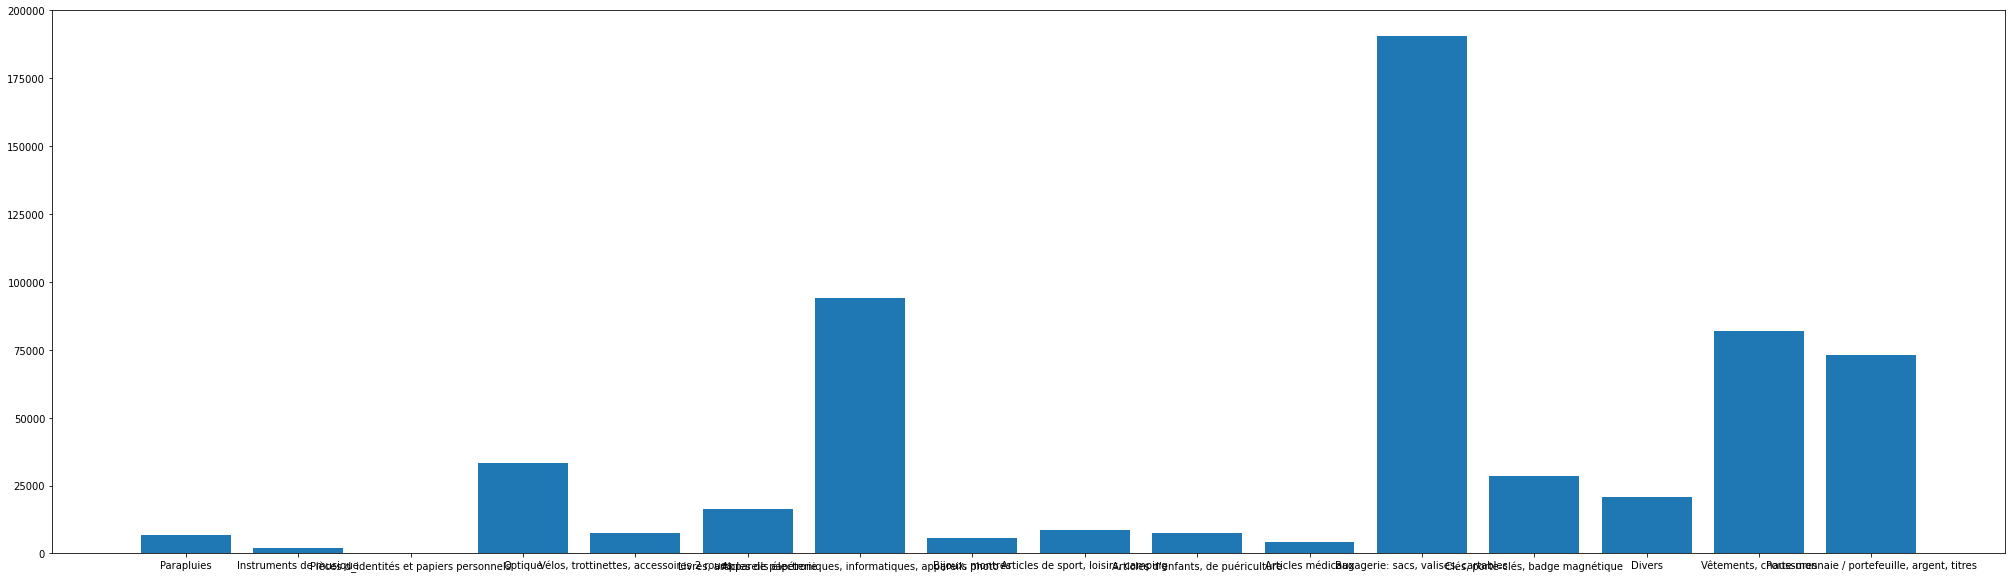

In [57]:
conclusionFrance()
#allCategories(listeObjetsTrouves)

### <u>Etude dans Vannes</u>

On créé d'abbord une table contenant touts les objets trouvés dans Vannes

In [40]:
objetsTrouvesVannes = cherche(listeObjetsTrouves, "ligne[2] == 'Vannes'")
objetsTrouvesVannes[0]

['2019-01-15T17:20:26+01:00',
 '2019-01-15T18:16:34+01:00',
 'Vannes',
 87476606,
 'Porte-monnaie, portefeuille',
 'Porte-monnaie / portefeuille, argent, titres',
 'Objet trouvé']

Voici les catégories d'objets trouvés à la gare de Vannes :

In [41]:
allCategories(objetsTrouvesVannes)

['Clés, porte-clés, badge magnétique',
 'Optique',
 'Bijoux, montres',
 'Bagagerie: sacs, valises, cartables',
 'Vêtements, chaussures',
 'Porte-monnaie / portefeuille, argent, titres',
 'Vélos, trottinettes, accessoires 2 roues',
 'Livres, articles de papéterie',
 "Pièces d'identités et papiers personnels",
 'Appareils électroniques, informatiques, appareils photo',
 'Parapluies',
 'Divers',
 'Articles médicaux',
 'Instruments de musique',
 "Articles d'enfants, de puériculture",
 'Articles de sport, loisirs, camping']

In [42]:
allLen = []

In [43]:
#on réinitialise les valeurs.
isDivers = 0
isBagagerie = 0
isLivres = 0
isAppareilsélectroniques = 0
isArticlesdesport = 0
isArticlesmédicaux = 0
isVélos= 0
isArticles = 0
isParapluies = 0
isPorte_monnaie= 0
isOptique = 0
isClés = 0
isInstruments = 0
isBijoux = 0
isPièces = 0
isVêtements = 0

In [44]:
def allCategories(tableau):
    categories = [ligne[5] for ligne in tableau]
    categories = list(set(categories))
    return categories
#allCategories(objetsTrouvesVannes)

['Clés, porte-clés, badge magnétique',
 'Optique',
 'Bijoux, montres',
 'Bagagerie: sacs, valises, cartables',
 'Vêtements, chaussures',
 'Porte-monnaie / portefeuille, argent, titres',
 'Vélos, trottinettes, accessoires 2 roues',
 'Livres, articles de papéterie',
 "Pièces d'identités et papiers personnels",
 'Appareils électroniques, informatiques, appareils photo',
 'Parapluies',
 'Divers',
 'Articles médicaux',
 'Instruments de musique',
 "Articles d'enfants, de puériculture",
 'Articles de sport, loisirs, camping']

In [45]:
#moreFound(objetsTrouvesVannes)

"Bagagerie: sacs, valises, cartables est la catégorie qui est le plus perdue avec 179 d'objets trouvés"

In [59]:
#graphique()

## Conclusion

(Toutes les cellules sont à éxecuter dans l'ordre pour éviter tout problème)

In [ ]:
def conclusionVannes():
    '''
    Fait la conclusion rédigée de l'analyse de ce tableau dans Vannes
    '''
    print("Pour résumer dans Vannes:")
    print(f"toutes les catégories sont stockées dans la fonction allCategories(objetsTrouvesVannes)")
    print(moreFound(objetsTrouvesVannes))
    print("ci dessous un graphique représentant les nombres d'objets perdu en fonction de leur catégorie")
    graphique()